In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [157]:
df = pd.read_csv("../Poland_DataFrame.csv")
df.head(5)
df = df.drop(labels= ["CPI yryrl", "Bank Lending yryr%"], axis = 1)
df = df.iloc[int(np.where(df["Date"] == "2001-01")[0]): len(df), :].reset_index(drop = True)
df.head(5)


,Date,Term_Premium,Risk_Premium,Stock_Prices_mom%_change,Stock_Prices_mom24mma%_change,Stock_Market_Volatility,REER,Current_Account_Balance_change_yryr%,Current_Account_Balance_over_GDP,One-Day_Repo_Rate_AVG,One-Day_Repo_Rate_EOP,Policy_Rate_&_Fed_Funds_Rate_Differential_AVG,Policy_Rate_&_Fed_Funds_Rate_Differential_EOP,Broad_Money_mo12m%_change,Velocity_of_Money_mo12m%_change,Portfolio_Flows,Foreign_Exchange_Reserve_change_yryr%,Foreign_Exchange_Reserve_over_GDP,Bank_Lending_mo12m%_change
0,2001-01,NaN,-5.20,-1.370720,NaN,NaN,97.935681,NaN,NaN,19.000000,19.0,13.260000,13.26,NaN,NaN,533.0,4.716161,NaN,-8.893340
1,2001-02,NaN,-5.35,-12.108282,NaN,-460.118264,99.768276,NaN,NaN,19.000000,19.0,13.410000,13.41,NaN,NaN,700.0,10.155146,NaN,-6.569047
2,2001-03,NaN,-5.70,-4.993633,NaN,-896.558353,101.862436,-47.892074,NaN,17.909091,17.0,12.619091,11.71,NaN,NaN,889.0,7.036003,NaN,-4.858568
3,2001-04,NaN,-5.59,3.878111,NaN,-481.096630,104.934131,-42.247577,NaN,17.000000,17.0,12.330000,12.33,NaN,NaN,-145.0,9.109126,NaN,-3.225208
4,2001-05,NaN,-6.05,2.366567,NaN,-409.006203,108.343974,-29.148237,NaN,17.000000,17.0,12.760000,12.76,NaN,NaN,-449.0,4.879346,NaN,-1.450431


In [158]:
for i in range(1, len(df.columns)):
    print(df.columns[i], end = " : ")
    print(np.var(df[df.columns[i]]))

Term_Premium : 0.1033939710472424
Risk_Premium : 1.8729691824658847
Stock_Prices_mom%_change : 36.83556019701147
Stock_Prices_mom24mma%_change : 0.042042545347321846
Stock_Market_Volatility : 562004.5753681957
REER : 38.317266872902714
Current_Account_Balance_change_yryr% : 290472.11641665024
Current_Account_Balance_over_GDP : 6.291821442761764
One-Day_Repo_Rate_AVG : 11.178147961987637
One-Day_Repo_Rate_EOP : 10.596318144614845
Policy_Rate_&_Fed_Funds_Rate_Differential_AVG : 8.639310308584149
Policy_Rate_&_Fed_Funds_Rate_Differential_EOP : 8.105348245649338
Broad_Money_mo12m%_change : 14.647867833740015
Velocity_of_Money_mo12m%_change : 0.0025582192698639416
Portfolio_Flows : 3494718.920848027
Foreign_Exchange_Reserve_change_yryr% : 173.7599233674407
Foreign_Exchange_Reserve_over_GDP : 0.01674754093903291
Bank_Lending_mo12m%_change : 75.17130175345234


In [159]:
df_scale = df.copy(deep = True)

''' Select data frame that ends at 2020-03 '''
end_index = None
for index in range(len(df)):
    if df_scale.iloc[index, 0] == "2020-03":
        end_index = index
        break
assert (end_index is not None)


''' Scale the data '''
def scale_series(series, mean, std):
    return (series - mean)/std
for col_num in range(1, len(df.columns)):
    df_scale.iloc[:, col_num] = scale_series(df_scale.iloc[:, col_num], df_scale.iloc[end_index: , col_num ].mean(), df_scale.iloc[end_index: , col_num ].std())


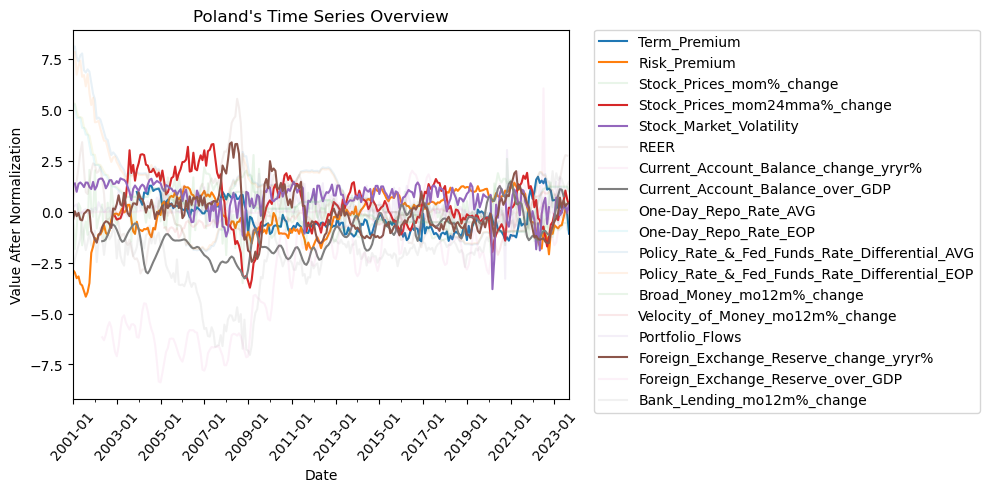

In [160]:


fig, ax = plt.subplots()
for i in range(1, len(df_scale.columns)):
    if df_scale.columns[i] in ["Term_Premium", "Risk_Premium", "Stock_Prices_mom24mma%_change", "Stock_Market_Volatility", "Current_Account_Balance_over_GDP", "Foreign_Exchange_Reserve_change_yryr%"]:
        ax.plot(df_scale["Date"], df_scale[df_scale.columns[i]], label = df_scale.columns[i], alpha = 1)
    else:
        ax.plot(df_scale["Date"], df_scale[df_scale.columns[i]], label = df_scale.columns[i], alpha = 0.1)
ax.legend()
plt.xlim(left = df_scale["Date"][0], right = df_scale["Date"][len(df)-1])
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(12))
plt.xlabel("Date")
plt.ylabel("Value After Normalization")
plt.xticks(rotation = 50)
plt.title("Poland's Time Series Overview")
ax.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., fontsize="10")     ##设置ax中legend的位置，将其放在图外
# plt.savefig("Poland's Time Series Overview.jpg")
plt.show()
plt.close()

/var/folders/88/bgw2vpm50ds4lg04qxvsx7cr0000gn/T/ipykernel_99363/2438281202.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center = 0, cmap="PiYG", xticklabels=False);


Text(0.5, 1.0, 'Correlation Matrix for Poland')

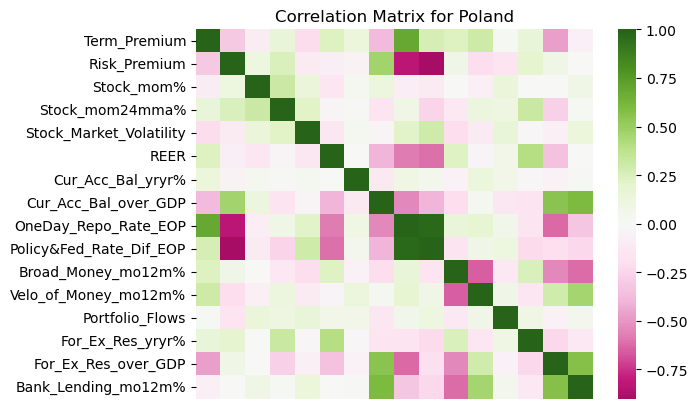

In [161]:
import seaborn as sns
df = pd.read_csv("Poland_DataFrame.csv")
df = df.drop(labels= ["CPI yryrl", "Bank Lending yryr%", "OneDay_Repo_Rate_AVG", "Policy&Fed_Rate_Dif_AVG"], axis = 1)
sns.heatmap(df.corr(), center = 0, cmap="PiYG", xticklabels=False);
plt.title("Correlation Matrix for Poland")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

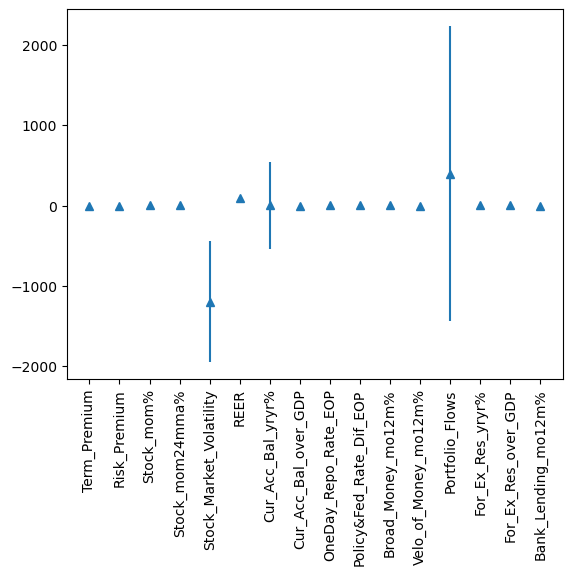

In [162]:
from functools import partial

fig, ax = plt.subplots()
plt.errorbar(df.columns[1:], df.iloc[:,1:].mean(axis = 0), df.iloc[:,1:].std(axis = 0), linestyle='None', marker='^')
# ax.set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
plt.xticks(rotation = 90)
